In [0]:
from sklearn.decomposition import PCA
import time
import warnings
import numpy as np
import scipy.ndimage
from matplotlib import pyplot as plt
%matplotlib inline
from google.colab import drive

In [3]:
warnings.filterwarnings('ignore')
drive.mount('/content/gdrive')
from google.colab import files
uploaded = files.upload()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Saving proba_original.jpeg to proba_original (1).jpeg
Saving proba_noisy.jpeg to proba_noisy (1).jpeg
Saving cameraman_original.jpeg to cameraman_original (1).jpeg
Saving cameraman_noisy.jpeg to cameraman_noisy (1).jpeg
Saving balloons_original.png to balloons_original (1).png
Saving balloons_noisy.jpeg to balloons_noisy (1).jpeg


In [0]:
data = scipy.ndimage.imread("cameraman_noisy.jpeg", mode='L')
golden_data = scipy.ndimage.imread("cameraman_original.jpeg", mode='L')

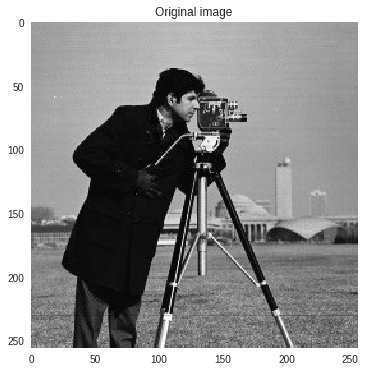

In [10]:
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots()
ax.grid(False)
plt.title("Original image")
plt.imshow(golden_data, cmap=plt.cm.gray, interpolation='nearest')

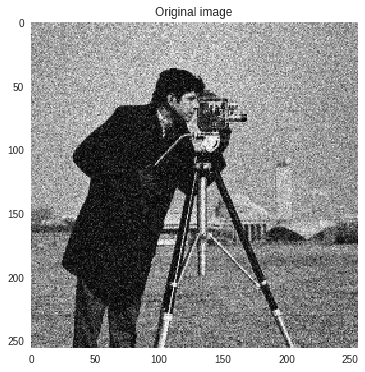

In [11]:
fig, ax = plt.subplots()
ax.grid(False)
plt.title("Original image")
plt.imshow(data, cmap=plt.cm.gray, interpolation='nearest')


Text(0.5, 1.0, 'Denoised PCA image')

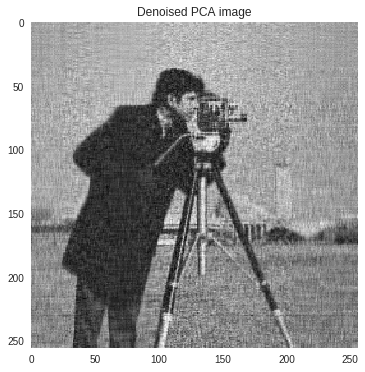

In [12]:
start = time.time()

pca = PCA(40)
pca_data = pca.fit_transform(data)
transf_data = pca.inverse_transform(pca_data)

def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

end = time.time()

fig, ax = plt.subplots()
ax.imshow(transf_data, cmap=plt.cm.gray, interpolation='nearest')

ax.grid(False)
plt.title("Denoised PCA image")



In [13]:

difference = transf_data - golden_data
print("Frobenius distance    ", np.linalg.norm(difference))
print("Time for calculation  ", end-start)
print("PSNR                  ", psnr(golden_data, transf_data))

Frobenius distance     4951.718597402988
Time for calculation   0.06577730178833008
PSNR                   22.40048379349396


Text(0.5, 1.0, 'Residuals')

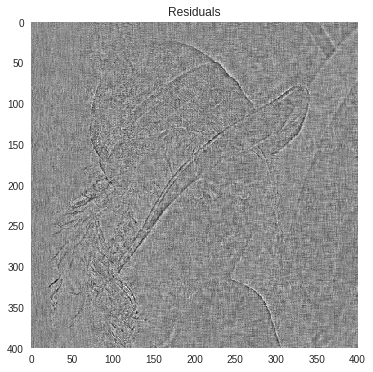

In [9]:
fig, ax = plt.subplots()
ax.grid(False)
ax.imshow(difference, cmap=plt.cm.gray, interpolation='nearest')
plt.title("Residuals")

In [0]:
`